## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Import the dataset
dataset= pd.read_csv("/content/drive/MyDrive/AlmaBetter/Machine Learning/Linear Regression/Linear Regression Implementation/Data/50_Startups.csv")

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.shape

(50, 5)

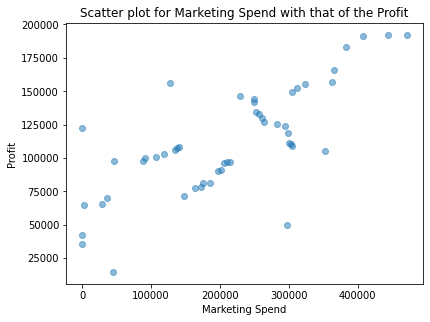

In [6]:
# Scatter plot for Marketing Spend with that of the Profit
plt.rcParams["figure.figsize"]=plt.rcParamsDefault["figure.figsize"]
plt.scatter(dataset["Marketing Spend"], dataset["Profit"],alpha=0.5)
plt.title("Scatter plot for Marketing Spend with that of the Profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

Text(0, 0.5, 'Profit')

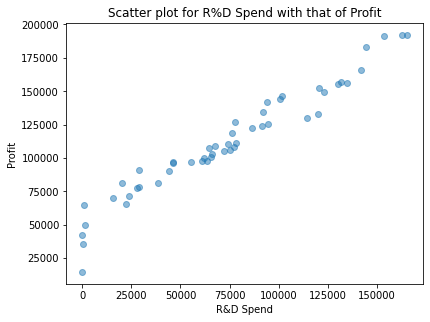

In [7]:
# Scatter plot for R%D Spend with that of Porfit
plt.scatter(dataset["R&D Spend"], dataset["Profit"],alpha=0.5)
plt.title("Scatter plot for R%D Spend with that of Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

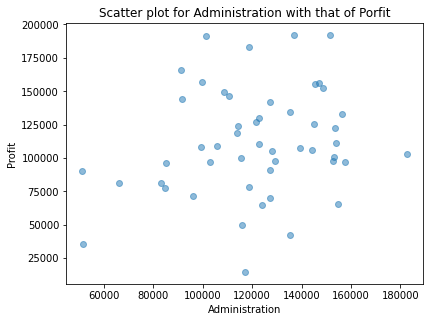

In [8]:
# Scatter plot for Administration with that of Porfit
plt.scatter(dataset["Administration"],dataset["Profit"],alpha=0.5)
plt.title("Scatter plot for Administration with that of Porfit")
plt.xlabel("Administration")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

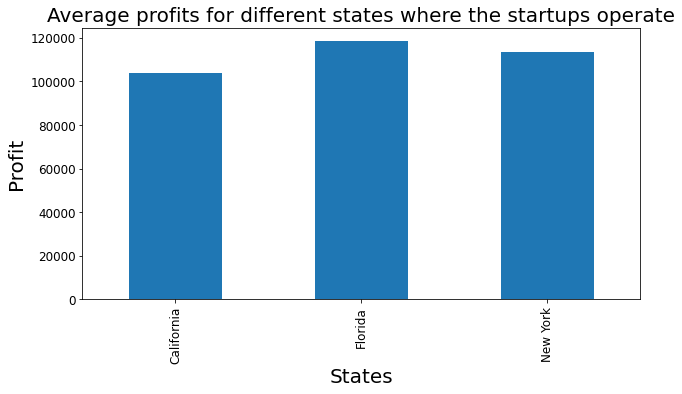

In [9]:
# Create figure object
ax = dataset.groupby(["State"])["Profit"].mean().plot.bar(figsize=(10,5),fontsize=12)

# Set the title and the labels
ax.set_title("Average profits for different states where the startups operate",fontsize=20)
ax.set_xlabel("States",fontsize=20)
ax.set_ylabel("Profit",fontsize=20)

In [10]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [11]:
# Creating dummy variables for the categorical variables
dataset["New York"]=np.where(dataset["State"]=="New York",1,0)
dataset["California"]=np.where(dataset["State"]=="California",1,0)
dataset["Florida"]=  np.where(dataset["State"]=="Florida",1,0)

# Drop the column "State"
dataset.drop(columns="State",axis=1,inplace=True)

In [12]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [13]:
# Create dependent variable 
dependent_variable="Profit"

In [14]:
# Creating a list of independent variables
independent_variables=list(set(dataset.columns.tolist())-{dependent_variable})

In [15]:
independent_variables

['California',
 'Marketing Spend',
 'Administration',
 'New York',
 'R&D Spend',
 'Florida']

In [16]:
dataset[independent_variables].head()

,California,Marketing Spend,Administration,New York,R&D Spend,Florida
0,0,471784.10,136897.80,1,165349.20,0
1,1,443898.53,151377.59,0,162597.70,0
2,0,407934.54,101145.55,0,153441.51,1
3,0,383199.62,118671.85,1,144372.41,0
4,0,366168.42,91391.77,0,142107.34,1


In [17]:
# Creating our dependent adnd independent variables' data
X = dataset[independent_variables].values

y=dataset[dependent_variable].values

In [18]:
# Splitting the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
X_train[0:10]

array([[0.0000000e+00, 2.1463481e+05, 1.0305749e+05, 0.0000000e+00,
        5.5493950e+04, 1.0000000e+00],
       [0.0000000e+00, 2.0551764e+05, 8.5047440e+04, 1.0000000e+00,
        4.6014020e+04, 0.0000000e+00],
       [0.0000000e+00, 1.3405007e+05, 1.4413598e+05, 0.0000000e+00,
        7.5328870e+04, 1.0000000e+00],
       [1.0000000e+00, 2.1079767e+05, 1.5769392e+05, 0.0000000e+00,
        4.6426070e+04, 0.0000000e+00],
       [0.0000000e+00, 2.9491957e+05, 1.1417579e+05, 0.0000000e+00,
        9.1749160e+04, 1.0000000e+00],
       [0.0000000e+00, 3.2387668e+05, 1.4553006e+05, 0.0000000e+00,
        1.3029813e+05, 1.0000000e+00],
       [0.0000000e+00, 2.5651292e+05, 1.5654742e+05, 0.0000000e+00,
        1.1994324e+05, 1.0000000e+00],
       [0.0000000e+00, 1.9039300e+03, 1.2415304e+05, 1.0000000e+00,
        1.0002300e+03, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 5.1743150e+04, 1.0000000e+00,
        5.4205000e+02, 0.0000000e+00],
       [0.0000000e+00, 1.0713838e+05,

In [20]:
# Scaling the data i.e., x-min(x)/max(x)-min(x)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
X_train[0:10]

array([[0.        , 0.45494286, 0.48655174, 0.        , 0.33561668,
        1.        ],
       [0.        , 0.43561799, 0.3173015 , 1.        , 0.2782839 ,
        0.        ],
       [0.        , 0.28413435, 0.87258866, 0.        , 0.45557444,
        1.        ],
       [1.        , 0.44680961, 1.        , 0.        , 0.2807759 ,
        0.        ],
       [0.        , 0.62511553, 0.59103645, 0.        , 0.55488118,
        1.        ],
       [0.        , 0.68649342, 0.88568959, 0.        , 0.7880179 ,
        1.        ],
       [0.        , 0.54370828, 0.98922572, 0.        , 0.72539353,
        1.        ],
       [0.        , 0.0040356 , 0.6847981 , 1.        , 0.0060492 ,
        0.        ],
       [0.        , 0.        , 0.00432296, 1.        , 0.00327821,
        0.        ],
       [0.        , 0.22709197, 0.95618996, 1.        , 0.39676926,
        0.        ]])

In [22]:
# fit the multiple linear regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
regressor.intercept_

44153.95466784861

In [27]:
dataset[independent_variables].columns

Index(['California', 'Marketing Spend', 'Administration', 'New York',
       'R&D Spend', 'Florida'],
      dtype='object')

In [24]:
regressor.coef_

array([ 8.66383692e+01,  1.72720281e+04,  3.49927567e+03,  7.86007422e+02,
        1.27892182e+05, -8.72645791e+02])

In [38]:
# Predicted values of the train data
y_pred_train=regressor.predict(X_train)
print(y_pred_train)

[ 95764.42320496  89164.62849777 109506.72329085  91366.2188941
 127111.48666646 159019.04337114 148905.9881254   48179.60744028
  45374.34722508 102951.9596798  145449.63178399  96684.71387299
  97535.3576194  116571.15139254  69421.13311312 116212.62095133
  60736.53267612 152787.95464277 127413.0337311  102210.16391827
 161822.7226407  131583.61511491  75019.09161337  48054.91969394
 189547.28196893 127528.92248422  85540.50570954 111255.8251405
 156191.10124356 108464.25100331  75306.81185049 119915.38726755
 115144.58914955 152688.90677959  81513.47163492  57298.28613018
 172852.28336637 192919.57537462  47007.62737751  65835.99435878]


In [31]:
# Actual values of the train data
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [32]:
# Predicting the test data results
y_pred= regressor.predict(X_test)

In [33]:
# Predicted profits on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [34]:
# Actual y values of the test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [39]:
# mean squared error of the train data
mean_squared_error(y_train,y_pred_train)

81571001.80077367

In [40]:
# Root mean squared error of train data
math.sqrt(mean_squared_error(y_train,y_pred_train))

9031.666612578969

In [35]:
# mean sqaured of the test data
mean_squared_error(y_test,y_pred)

83502864.0325772

In [36]:
# root mean squared of the test data
math.sqrt(mean_squared_error(y_test,y_pred))

9137.990152794935

In [41]:
# R-squared score for the train data
r2_score(y_pred_train,y_train)

0.9475731045123278

In [37]:
# R-squared score for the test data
r2_score(y_test,y_pred)

0.9347068473282426